- Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 





In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('Lligues europees UEFA.csv', sep =";", encoding = 'Latin',)
df = pd.DataFrame(data)
df.columns


Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [19]:
df.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [20]:
df.shape 

(98, 21)

In [106]:
# Nos quedaremos con las características sintéticas ...['Rk','xG','xGA','xGD']

new_df =  df[['xG','xGA','xGD','Rk']]
new_df

,xG,xGA,xGD,Rk
0,86.1,26.8,59.3,1
1,84.6,33.1,51.4,2
2,73.0,45.8,27.2,3
3,88.1,37.1,51.0,4
4,71.6,38.1,33.4,5
...,...,...,...,...
93,41.3,68.5,-27.2,94
94,35.4,70.5,-35.1,95
95,37.8,64.1,-26.3,96
96,33.0,73.3,-40.4,97


In [107]:
corr = new_df.corr()   # primer vistazo visual 

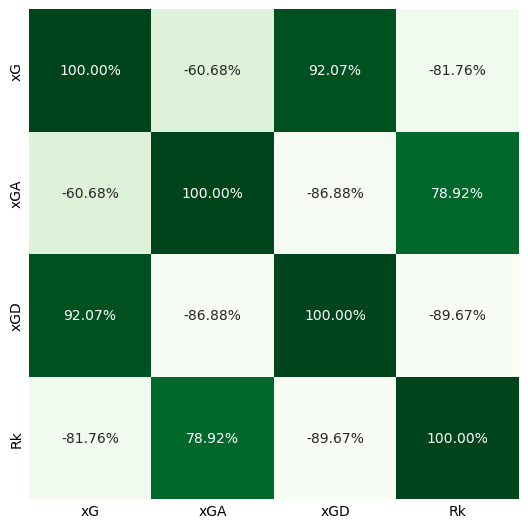

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))


heatmap =sns.heatmap(corr, cbar = False, square= True, fmt='.2%', annot=True, cmap='Greens')

- Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [34]:
# Veamos si la estadística xGD ( puntos/Diferencia Goles )  Vs Rk


# H0: winners ( Top 20Rk ) son tambien los que tiene una mejor estadística (Top 20xGD ) 
#      
#                         ..dicho de otra forma ...xGD  NO explica las diferencia de Ranking
    
 # H1 : xGD SI explica las diferencia de Ranking


data1_Rk = winners_Rk = new_df[:20]['Rk']
data1_xGD = winners_xG  = new_df[:20]['xGD'].sort_values(ascending = False)




from scipy.stats import ttest_ind


stat, p = ttest_ind(data1_Rk, data1_xGD)                 # TOP20 Rk  Vs TOP20 xGD
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    
	print('Same distributions (fail to reject H0).\n\nPodemos decir con un 5% de margen de error que la estadística xGD NO explica \nla diferencia de Ranking  ')
else:
	print('\nDifferent distributions (reject H0, son grupos diferentes )\n\nPodemos decir con un 5% de margen de error que la estadística xGD (Puntos/Diferencia de Goles) SI explica la diferencia de Ranking  ')


Statistics=-4.934, p=0.000

Different distributions (reject H0, son grupos diferentes )

Podemos decir con un 5% de margen de error que la estadística xGD (Puntos/Diferencia de Goles) SI explica la diferencia de Ranking  


In [ ]:
# Hagamos lo mismo con la variable sintética ( polinomio) xGA ( Puntos/ Goles en contra)

In [84]:
# H0: Winners ( Top 20Rk )  son tambien los que tiene  una mejor estadística (Top 20xGA ) 
#      
#                         ..dicho de otra forma ...xGA  NO explica las diferencia de Ranking
    
 # H1 : xGA SI explica las diferencia de Ranking

from scipy.stats import ttest_ind


data2_Rk = winners_Rk = new_df[:20]['Rk']
data2_xGA = winners_xG  = (new_df[:20]['xGA']).sort_values(ascending = False) 




stat, p = ttest_ind(data2_Rk, data2_xGA)                 # TOP20 Rk  Vs TOP20 xGA
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    
	print('Same distributions (fail to reject H0).\n\nPodemos decir con un 5% de margen de error que la estadística xGA no explica \nla diferencia de Ranking  ')
else:
	print('Different distributions (reject H0)\n\nPodemos decir con un 5% de margen de error que la estadística xGA (Puntos/GolesContra) SI explica \nla diferencia de Ranking ')


Statistics=-15.596, p=0.000
Different distributions (reject H0)

Podemos decir con un 5% de margen de error que la estadística xGA (Puntos/GolesContra) SI explica 
la diferencia de Ranking 


In [ ]:
# Lo mismo conla última variable sintética P/Gol

In [36]:
data3_Rk = winners_Rk = df[:20]['Rk']
data3_xG = winners_xGD  = df[:20]['xG'].sort_values(ascending = False)




from scipy.stats import ttest_ind


stat, p = ttest_ind(data3_Rk, data3_xG)                 # TOP20 Rk  Vs TOP20 xG (Puntos/Gol)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    
	print('Same distributions (fail to reject H0).\n\nPodemos decir con un 5% de margen de error que la estadística xG NO explica \nla diferencia de Ranking  ')
else:
	print('Different distributions (reject H0)\n\nPodemos decir con un 5% de margen de error que la estadística xG (Puntos/GolFavor) SI explica \nla diferencia de Ranking  ')




Statistics=-17.572, p=0.000
Different distributions (reject H0)

Podemos decir con un 5% de margen de error que la estadística xG (Puntos/GolFavor) SI explica 
la diferencia de Ranking  


- Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



In [117]:
#Hipotesis :  equipos con la mejor estadística GF tienen más puntos (GF "explica" parte del Pts)
# Ha : GF no "explica" Pts

Top20_Goles= (df[:20]['GF']).sort_values(ascending = False) 
Top20_Puntos = (df[:20]['Pts']).sort_values(ascending = False)

Top20_Goles.head(5) #  TOP 20 con la mejor estadística GF

3    97
0    96
1    89
8    85
4    85
Name: GF, dtype: int64

In [118]:
Top20_Puntos.head(5)

0    90
1    86
2    85
4    83
5    83
Name: Pts, dtype: int32

In [119]:
#...Hipotesis :  equipos con la mejor estadística GF  son max puntos(GF "explica" parte del Pts)


stat, p = ttest_ind(Top20_Goles, Top20_Puntos)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    
	print('Same distributions (fail to reject H0).\n\nPodemos decir con un 5% de margen de error que la estadística GF (Goles a favor) SI explica la diferencia de Pts')

    
else:
	print('Different distributions (reject H0)\n\nLa estadística GF(Goles a favor)  NO explica la diferencia de Pts  ')


Statistics=-0.184, p=0.855
Same distributions (fail to reject H0).

Podemos decir con un 5% de margen de error que la estadística GF (Goles a favor) SI explica la diferencia de Pts


- Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



In [105]:
winners_xGD = data6 = df[:20]['xGD']                                     # Top 20 ( Estadística Puntos/ partido)
winners_xG = data7 = df[:20]['xG']                                          # Top 20 ( Estadística Puntos/ Gol)
winners_GA = data8 = df[(len(df)-20):]['xGA'].sort_values(ascending = False)  # Top 20 (Estadística Puntos/ GolAgainst, equipos menor xGA)




# data6() vs data7() vs data8()  : H0 : TOP20 estadística xGD es el mismo TOP20 de mejor estadísticas xG y xGA

#vs data8()

from scipy.stats import f_oneway
stat, p = f_oneway( data6, data7, data8)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution\n\n,estas 3 características ( MAX puntos, MAX GolesFavor  y MIN GolesContra ) están relacionadas i explican la clasificación')
else:
 print('Probably different distributions,\n\nTOP 20 equipos xG ( Estadística Puntos/ Gol) es diferente del TOP 20 xGA ( equipos con mejor estadística Pts/ GA) o bien es diferente del TOP20 xGD')

stat=61.257, p=0.000
Probably different distributions,

TOP 20 equipos xG ( Estadística Puntos/ Gol) es diferente del TOP 20 xGA ( equipos con mejor estadística Pts/ GA) o bien es diferente del TOP20 xGD


Si hacemos ANOVA por separado ( 2 grupos ) veremos si alguno de los 3 grupos tiene distribuciones similares 

In [ ]:
winners_xGD = data6 = df[:20]['xGD']                                     # Top 20 ( Estadística Puntos/ partido)
winners_xG = data7 = df[:20]['xG']                                          # Top 20 ( Estadística Puntos/ Gol)
winners_GA = data8 = df[(len(df)-20):]['xGA'].sort_values(ascending = False)  # Top 20 (Estadística Puntos/ GolAgainst, equipos menor xGA)


In [81]:
# Anova test 2 grupos TOP 20 xGD  vs TOP20 xG


from scipy.stats import f_oneway
stat, p = f_oneway( data6, data7)    #  TOP 20 xGD  vs TOP20 xG
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution\n\n,TOP 20 equipos xG ( Estadística Puntos/ Gol) es igual del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles)' )
else:
 print('Probably different distributions,\n\nTOP 20 equipos xG ( Estadística Puntos/ Gol) es diferente del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles) ')

stat=80.342, p=0.000
Probably different distributions,

TOP 20 equipos xG ( Estadística Puntos/ Gol) es diferente del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles) 


In [102]:
# Anova test 2 grupos :TOP 20 xG  vs TOP20 xGA

from scipy.stats import f_oneway
stat, p = f_oneway( data7, data8)   #  TOP 20 xG  vs TOP20 xGA
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution\n\nTOP 20 equipos xGA ( Puntos/ Gol en contra ) es similar del TOP 20 xG ( equipos con mejor estadística Pts/ Goles)')
else:
 print('Probably different distributions,\n\nTOP 20 equipos xGA ( Puntos/ Gol en contra ) es diferente del TOP 20 xG ( equipos con mejor estadística Pts/ Goles) ')

stat=2.557, p=0.118
Probably the same distribution

TOP 20 equipos xGA ( Puntos/ Gol en contra ) es similar del TOP 20 xG ( equipos con mejor estadística Pts/ Goles)


In [104]:
# Anova test 2 grupos :TOP 20 xGD  vs TOP20 xG

from scipy.stats import f_oneway
stat, p = f_oneway( data7, data8)   #  TOP 20 xGD  vs TOP20 xGA
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution\n\nTOP 20 equipos xGA ( Puntos/ Gol en contra ) es similar del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles)')
else:
 print('Probably different distributions,\n\nTOP 20 equipos xGA ( Puntos/ Gol en contra ) es diferente del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles) ')

stat=2.557, p=0.118
Probably the same distribution

TOP 20 equipos xGA ( Puntos/ Gol en contra ) es similar del TOP 20 xGD ( equipos con mejor estadística Pts/ Diferencia de Goles)


Tras los tres Test Anova ( 2 grupos) vemos que el grupo  TOP 20 xGD  !=   TOP20 xG
                                           que el grupo  TOP 20 xGD   =   TOP20 xGA
                                           que el grupo  TOP 20 xG    =   TOP20 xGA
        
        
Sería suficiente  con conservar xGD y xGA como variables explicativas  y desestimar xG.  
        
        
        

In [60]:
# Vamos a ver si la clasificación ( Pts) tiene una distribución Normal

# 1. Normality Tests ( check if your data has a Gaussian distribution.)
#Shapiro-Wilk Test
import pandas as pd
import numpy as np
import seaborn as sns



from scipy.stats import shapiro
stat, p = shapiro(df['Pts'])
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian, not normal distribution')



stat=0.97, p=0.03
Probably not Gaussian, not normal distribution


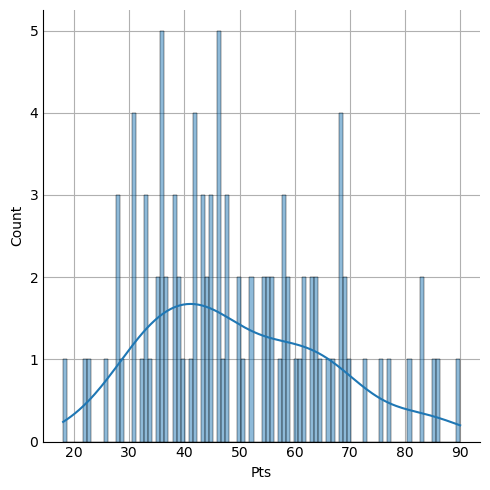

In [62]:
#Vamos a ver gráficamente si la clasificacion tiene forma Normal ( Gaussiana) o no como sugiere el Shapiro Test previo...



sns.displot(data = data, x = 'Pts', kde = True, bins = len(df))  # distribución equipos/puntos


# La clasificación ( Pts) tiene una distribución "Right-tailed", hay más equipos en la parte baja de la clasificación que en la parte alta de la clasificación.
# Tiene una forma parecida a una distribución Normal de todas formas. Vamos a intentar confirmar con otro Test

In [63]:
#  D'Agostino's K^2 Normality Test

from scipy.stats import normaltest
stat, p = normaltest(df['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=4.330, p=0.115
Probably Gaussian


In [ ]:
# Este Test nos dice lo contrario, probablemente la clasificación ( data.Pts) Si tiene una distribución Normal

In [88]:
# Pearson's Correlation test

from scipy.stats import pearsonr

data9 = df['Rk']
data10 = df['xGD']
stat, p = pearsonr(data9, data10)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.897, p=0.000
Probably dependent
